In [52]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

In [53]:
'''Esta função calcula o valor do campo elétrico E em cada posição r=(x,y) do grid. A carga é representada por q.
O denominador da função é a hipotenusa (np.hypot) do vetor posição (x-rx)-(y-ry). Como E é uma grandeza vetorial,
temos no retorno as componentes x e y, visto que estamos no caso 2D'''

def E(q, r, x, y):
    denominador = np.hypot(x-r[0], y-r[1])**3
    return q * (x - r[0]) / denominador, q * (y - r[1]) / denominador

In [54]:
'''Vamos aqui montar o grid onde serão plotadas as curvas equipotenciais. Utilizaremos as funções linspace e meshgrid.
A função meshgrid dispõe os pontos dos espaços lineares em um retângulo de dimensões X.Y '''

nx, ny = 100, 100
x = np.linspace(-2, 2, nx)
y = np.linspace(-2, 2, ny)
X, Y = np.meshgrid(x, y)

In [64]:
'''Como estamos fazendo para um dipolo elétrico, temos n = 2 cargas'''
n = 2
charges = []
for i in range(n):
    q = i%2 * 2 - 1
    charges.append((q, (np.cos(2*np.pi*i/n), np.sin(2*np.pi*i/n))))

In [65]:
'''Para montar o vetor Campo Elétrico, vamos primeiro criar um array de zeros do tamanho do nosso espaço linear (100x100)
A vantagem disso é não precisar utilizar a função .append, podendo apenas substituir os valores em cada posição do vetor'''

Ex, Ey = np.zeros((ny, nx)), np.zeros((ny, nx))
for charge in charges:
    ex, ey = E(*charge, x=X, y=Y)
    Ex += ex
    Ey += ey

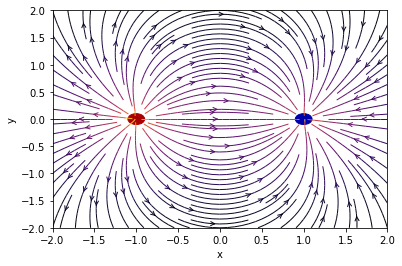

In [66]:
'''Agora podemos nos concentrar no plot das equipotenciais. Como é uma grandeza vetorial, é conveniente fazer o plot em forma
de Linhas de Campo, ou um mapa vetorial com os sentidos das linhas de campo, indo da carga positiva para a negativa.'''
fig = plt.figure()
ax = fig.add_subplot(111)

color = 2 * np.log(np.hypot(Ex, Ey))
ax.streamplot(x, y, Ex, Ey, color=color, linewidth=1, cmap=plt.cm.inferno,
              density=1.5, arrowstyle='->', arrowsize=1)
charge_colors = {True: '#aa0000', False: '#0000aa'}
for q, pos in charges:
    ax.add_artist(Circle(pos, 0.1, color=charge_colors[q>0]))
    
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
plt.show()